### Imports

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns

from file_parsing import files_to_df

#sns.set_theme()
#%matplotlib inline

In [206]:
def ts_formatter(ts):
    return ts.split('.')[0][:5]

def add_datetime(df):
    df['timestamp_h_m'] = df['timestamp'].map(ts_formatter)
    df['datetime'] = df['date'] + ' ' + df['timestamp_h_m']
    #df['datetime'] = pd.to_datetime(df['datetime'])
    return df

In [207]:
def process_counts(folder_paths):

    frames = []

    for path in folder_paths:
        df = files_to_df(path).sort_values(by=['timestamp']).reset_index(drop=True)
        df = add_datetime(df)

        subset = [
        'in_count',
        'out_count',
        'classwise_count_brown_IN', 
        'classwise_count_brown_OUT', 
        'classwise_count_white_IN', 
        'classwise_count_white_OUT'
        ]

        df_diff_raw = df[subset].diff()

        df['file_changed'] = df['filename'].ne(df['filename'].shift().bfill()).astype(int)

        m = df['file_changed'] == 0
        df_diff = df_diff_raw.where(m, df[subset])

        subset_in = ['in_count', 'classwise_count_brown_IN', 'classwise_count_white_IN']
        subset_out = ['out_count', 'classwise_count_brown_OUT', 'classwise_count_white_OUT']
        cols_out = ['total_out', 'brown_out', 'white_out']

        df_cumsum = df_diff.cumsum()

        for col_in, col_out, res_out in zip(subset_in, subset_out, cols_out):
           df_cumsum[res_out] = df_cumsum[col_out] - df_cumsum[col_in]

        cols = subset_in + subset_out
        cols_new = {key: (value + '_sum') for key, value in zip(cols, cols)}

        df_cumsum.rename(columns=cols_new, inplace=True)

        subset_orig = [
        'date',
        'timestamp_h_m',
        'datetime',
        'speed_max', 
        'speed_min',
        'speed_perc_75', 
        'speed_perc_50', 
        'speed_mean'
        ]

        df_res = df[subset_orig].join(df_diff).join(df_cumsum)

        frames.append(df_res)

    return pd.concat(frames).sort_values(by=['datetime']).reset_index(drop=True)

In [ ]:
folder_paths = [
    'path/to/inference/logged_data'
    ]

df_res = process_counts(folder_paths)

In [209]:
df_res.head(10)

,date,timestamp_h_m,datetime,speed_max,speed_min,speed_perc_75,speed_perc_50,speed_mean,in_count,out_count,...,classwise_count_white_OUT,in_count_sum,out_count_sum,classwise_count_brown_IN_sum,classwise_count_brown_OUT_sum,classwise_count_white_IN_sum,classwise_count_white_OUT_sum,total_out,brown_out,white_out
0,2025-03-30,11:10,2025-03-30 11:10,0.000100,0.000100,0.000100,0.000100,0.000100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-30,11:15,2025-03-30 11:15,0.000100,0.000100,0.000100,0.000100,0.000100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-03-30,11:20,2025-03-30 11:20,50.453468,32.687576,46.011995,41.570522,41.570522,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2025-03-30,11:25,2025-03-30 11:25,50.453468,32.687576,46.011995,41.570522,41.570522,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2025-03-30,11:30,2025-03-30 11:30,50.453468,32.687576,46.011995,41.570522,41.570522,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,2025-03-30,11:35,2025-03-30 11:35,50.453468,32.687576,46.011995,41.570522,41.570522,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,2025-03-30,11:40,2025-03-30 11:40,50.453468,32.687576,46.011995,41.570522,41.570522,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,2025-03-30,11:45,2025-03-30 11:45,50.453468,32.687576,46.011995,41.570522,41.570522,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,2025-03-30,11:50,2025-03-30 11:50,50.453468,32.687576,46.011995,41.570522,41.570522,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,2025-03-30,11:55,2025-03-30 11:55,50.453468,32.687576,46.011995,41.570522,41.570522,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
def plot_counts_bar(df, attr_x, attr_y_up, attr_y_down, attr_y_up_cumsum=None,
                    x_label_counts='YYYY-MM-DD', y_label_counts='Counts [n]', 
                    leg_entr_counts=['counts OUT', 'counts IN', 'cumulative sum counts OUT - IN'],
                    tick_freq_x=4, show_activity=False, 
                    activity_attr=['speed_perc_50','speed_perc_75'],
                    y_label_activity='Estimated Velocity [pixel/s]',
                    leg_entr_act=['50th percentile', '75th percentile'],
                    colors_act=['cornflowerblue', 'forestgreen']):
    
    data_x = df[attr_x]
    data_len = len(df)

    if show_activity:
        fig, axes = plt.subplots(2, 1, figsize=(12, 8), 
                                 gridspec_kw={'height_ratios': [1, 2]}, sharex=True)
        
        for data_attr, leg_entry, color in zip(activity_attr, leg_entr_act, colors_act):
                axes[0].plot(data_x, df[data_attr], label=leg_entry, color=color)

        axes[0].set_ylabel(y_label_activity)
        axes[0].grid(axis='x')
        axes[0].legend(loc='upper left')
        ax = axes[1]
    else:
        fig, ax = plt.subplots(figsize=(12, 5))
    
    ax.bar(data_x, df[attr_y_up], label=leg_entr_counts[0], width=0.7, color='steelblue')
    ax.bar(data_x, -df[attr_y_down], label=leg_entr_counts[1], width=0.7, color='peru')

    if attr_y_up_cumsum is not None:
         ax.plot(data_x, df[attr_y_up_cumsum], label=leg_entr_counts[2], color='firebrick')
    
    ax.set_xlabel(x_label_counts)
    ax.set_ylabel(y_label_counts)

    ax.set_xticks(range(0, data_len, tick_freq_x))
    ax.set_xticklabels(data_x[range(0, data_len, tick_freq_x)], rotation=45)
    ax.grid(axis='x')
    ax.legend(loc='upper left')

    fig.tight_layout()
    plt.show()
    

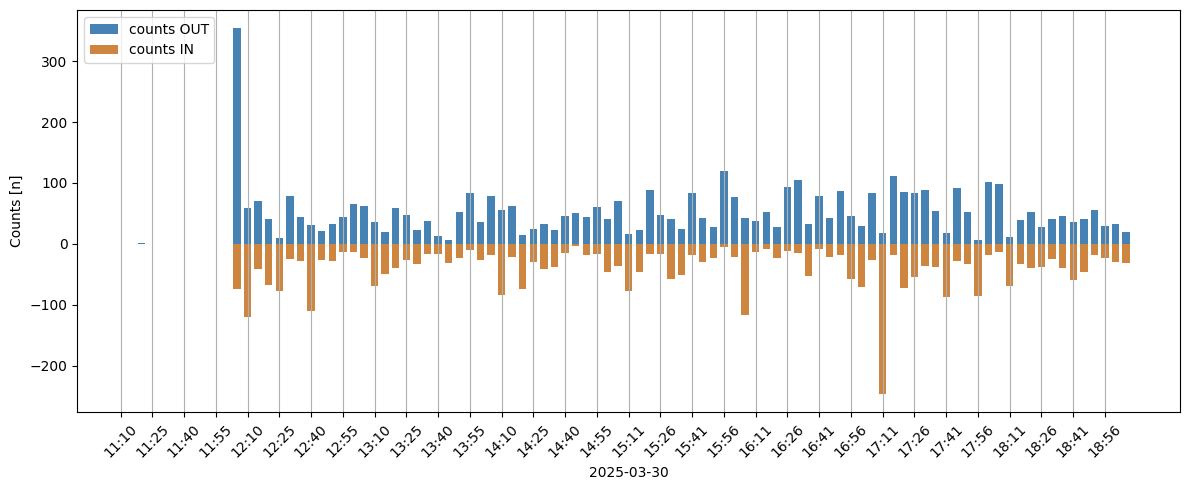

In [ ]:
plot_counts_bar(df_res, 'timestamp_h_m', 'out_count', 'in_count', 'total_out',
                x_label_counts='2025-03-30', tick_freq_x=3, show_activity=False)